In [1]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
btc = pd.read_csv('btcusd_data.csv')
btc.tail()

,Date,Close,Open,High,Low
2611,12/3/20,19445.39844,19205.92578,19566.19141,18925.78516
2612,12/4/20,18699.76563,19446.96680,19511.40430,18697.19336
2613,12/5/20,19154.23047,18698.38477,19160.44922,18590.19336
2614,12/6/20,19345.12109,19154.17969,19390.50000,18897.89453
2615,12/7/20,19086.02930,19359.35742,19410.51172,18931.14258


In [17]:
#btc = btc.loc['2014-01-01':]

In [4]:
btc = btc[93:]
btc.head()

,Date,Close,Open,High,Low
93,1/1/14,769.09849,768.40783,774.26333,750.52516
94,1/2/14,804.02719,769.09849,826.34166,768.15367
95,1/3/14,813.31748,804.02719,839.85833,798.11833
96,1/4/14,871.11583,813.31748,873.98000,808.71666
97,1/5/14,970.65083,871.11583,972.00354,861.25831


In [5]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [6]:
btc = btc.set_index('Date')

In [7]:
returns = btc['Close'].pct_change()

In [8]:
import monthly_returns_heatmap as mrh

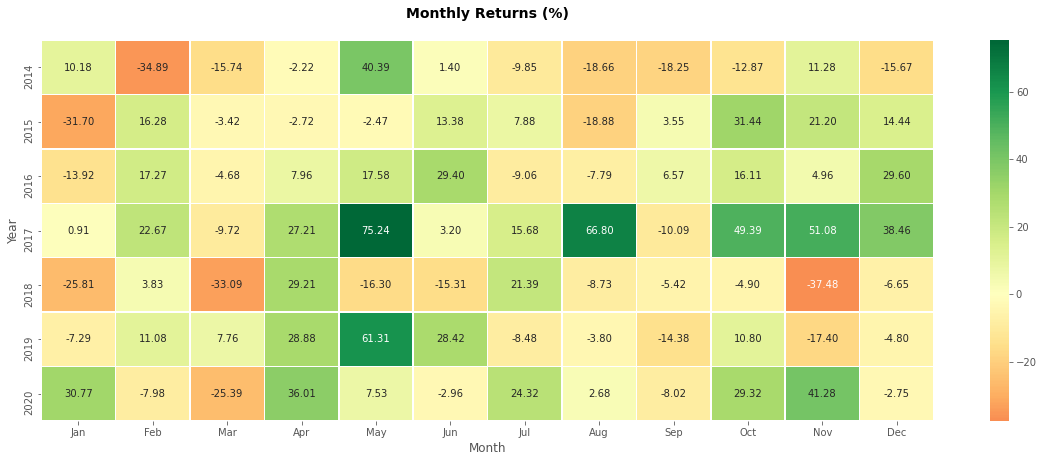

In [9]:
mrh.plot(returns, figsize=(20,7))

In [10]:
heatmap = mrh.get(returns) # <== or using direct call

print(heatmap)

Month       Jan       Feb       Mar       Apr       May       Jun       Jul  \
Year                                                                          
2014   0.101762 -0.348887 -0.157414 -0.022206  0.403925  0.014039 -0.098486   
2015  -0.316967  0.162793 -0.034250 -0.027209 -0.024715  0.133795  0.078787   
2016  -0.139239  0.172693 -0.046775  0.079555  0.175775  0.293993 -0.090620   
2017   0.009063  0.226651 -0.097229  0.272128  0.752365  0.032026  0.156753   
2018  -0.258129  0.038287 -0.330869  0.292051 -0.163048 -0.153089  0.213897   
2019  -0.072890  0.110811  0.077645  0.288846  0.613130  0.284159 -0.084796   
2020   0.307651 -0.079806 -0.253851  0.360084  0.075276 -0.029618  0.243197   

Month       Aug       Sep       Oct       Nov       Dec  
Year                                                     
2014  -0.186578 -0.182497 -0.128704  0.112783 -0.156669  
2015  -0.188809  0.035464  0.314359  0.212046  0.144416  
2016  -0.077913  0.065666  0.161110  0.049576  0.295957 

In [11]:
btc_returns_month = pd.DataFrame(heatmap)

Text(0.5, 0, 'Year')

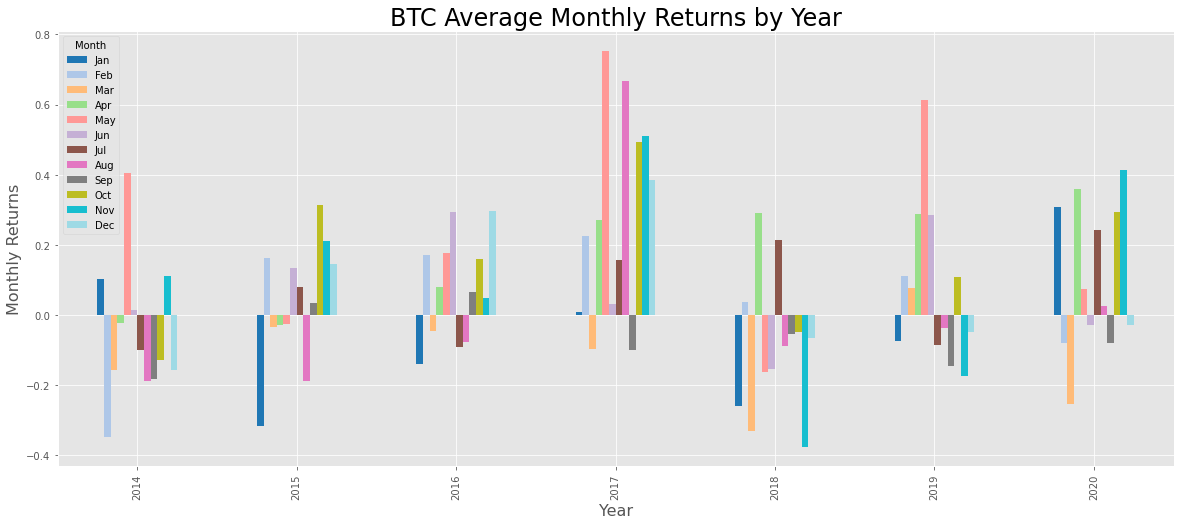

In [12]:
btc_returns_month.plot(kind='bar', lw = 4,figsize=(20,8), cmap = 'tab20')
plt.title('BTC Average Monthly Returns by Year', fontsize=24)
plt.ylabel('Monthly Returns', fontsize=16)
plt.xlabel('Year', fontsize=16)

In [13]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_returns = [btc_returns_month['Jan'].mean().round(5), btc_returns_month['Feb'].mean().round(5), btc_returns_month['Mar'].mean().round(5),
                btc_returns_month['Apr'].mean().round(5), btc_returns_month['May'].mean().round(5), btc_returns_month['Jun'].mean().round(5),
                btc_returns_month['Jul'].mean().round(5), btc_returns_month['Aug'].mean().round(5), btc_returns_month['Sep'].mean().round(5),
                btc_returns_month['Oct'].mean().round(5), btc_returns_month['Nov'].mean().round(5), btc_returns_month['Dec'].mean().round(5)]

In [14]:
returns_df = pd.DataFrame({'Month':x, 'Values':mean_returns})

In [15]:
returns_df = returns_df.set_index('Month')

In [16]:
returns_df['Values'] = returns_df['Values'] * 100

Text(0.5, 0, 'Month')

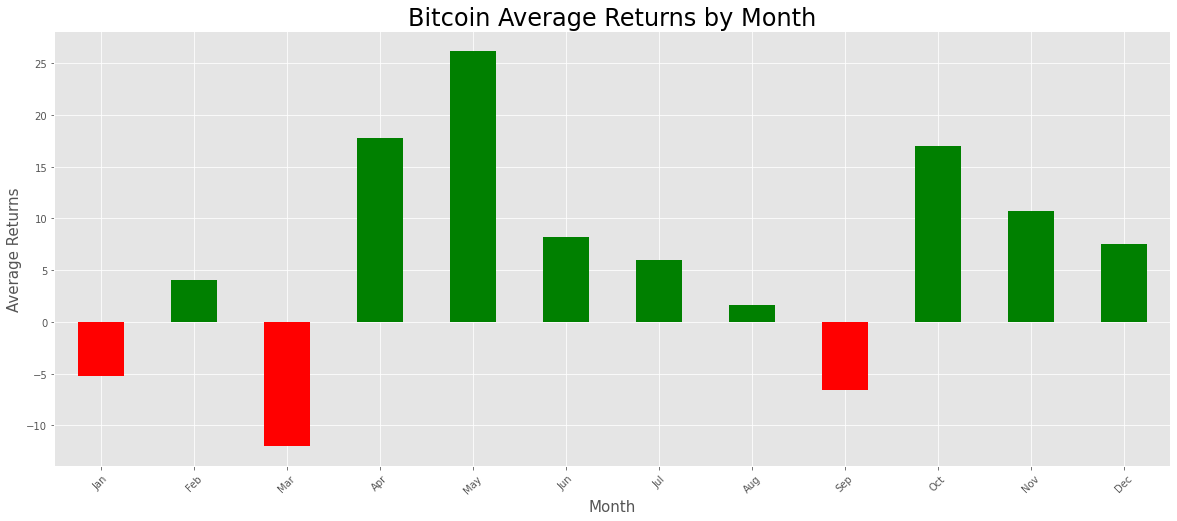

In [17]:
f, ax = plt.subplots(figsize=(20,8))

returns_df['Values'].plot(kind = 'bar',  color=(returns_df['Values'] > 0).map({True: 'g', False: 'r'}))
ax.set_title('Bitcoin Average Returns by Month', fontsize=24)
ax.set_ylabel('Average Returns', fontsize=15)
plt.xticks(rotation=45)
ax.set_xlabel('Month', fontsize=15)

In [18]:
btc['Pct_Change'] = btc['Close'].pct_change() * 100

In [19]:
btc = btc.reset_index()

In [20]:
btc['Day of Week'] = btc['Date'].apply(lambda time: time.dayofweek)
btc.tail()

,Date,Close,Open,High,Low,Pct_Change,Day of Week
2518,2020-12-03,19445.39844,19205.92578,19566.19141,18925.78516,1.272358,3
2519,2020-12-04,18699.76563,19446.96680,19511.40430,18697.19336,-3.834495,4
2520,2020-12-05,19154.23047,18698.38477,19160.44922,18590.19336,2.430324,5
2521,2020-12-06,19345.12109,19154.17969,19390.50000,18897.89453,0.996598,6
2522,2020-12-07,19086.02930,19359.35742,19410.51172,18931.14258,-1.339313,0


([<matplotlib.axis.XTick at 0x7fda11ecdbd0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

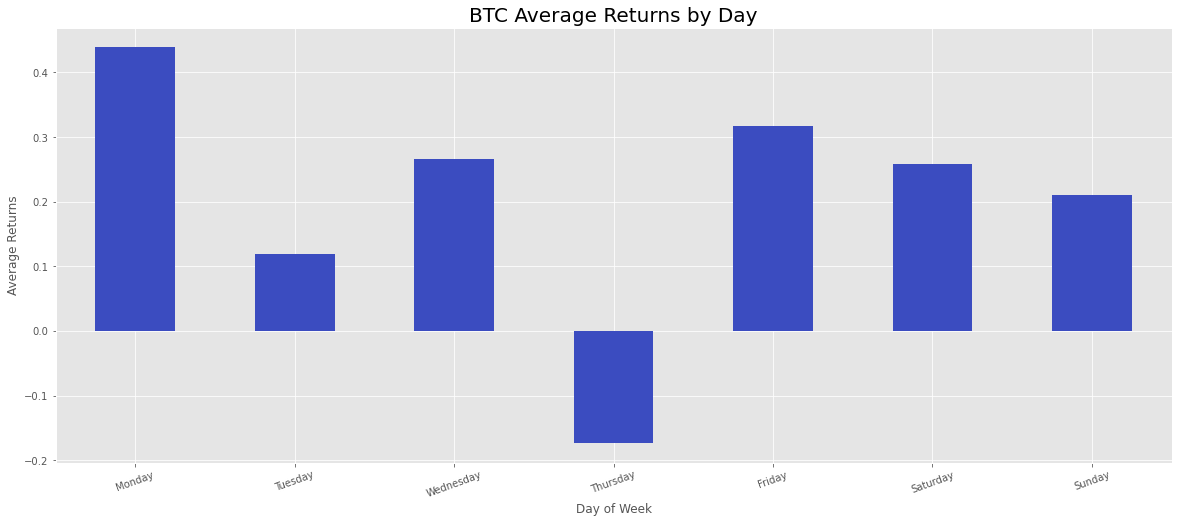

In [21]:
btc[['Day of Week', 'Pct_Change']].groupby('Day of Week').mean().plot(kind='bar', legend=None, cmap='coolwarm', figsize=(20,8))
plt.title('BTC Average Returns by Day', fontsize=20)
plt.ylabel('Average Returns')
plt.xticks([0, 1, 2, 3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=20)

In [22]:
btc_yrly = btc.copy()

In [27]:
btc_yrly = btc_yrly.set_index('Date')

In [28]:
btc_yrly = btc_yrly.resample('Y').sum()
btc_yrly.tail()

,Close,Open,High,Low,Pct_Change,Day of Week
Date,,,,,,
2016-12-31,2.077697e+05,2.072377e+05,2.100757e+05,2.044368e+05,90.546079,1101
2017-12-31,1.454898e+06,1.442423e+06,1.508426e+06,1.380652e+06,311.056110,1098
2018-12-31,2.681076e+06,2.690409e+06,2.769973e+06,2.598497e+06,-89.800687,1053
2019-12-31,2.679158e+06,2.674515e+06,2.744170e+06,2.601679e+06,89.861258,1092
2020-12-31,3.524410e+06,3.511703e+06,3.589292e+06,3.430560e+06,119.646058,1028


In [35]:
(317/769) - 1

-0.58777633289987

In [36]:
# Define dataframe variable
bit = pd.DataFrame()

# Define stock that will be analysed
asset = 'BTC-USD'
 
# Import data into dataframe
bit = web.DataReader(asset, data_source='yahoo', start='01-01-1993')

bit.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [79]:
b2014 = btc[:365]

In [80]:
ret_14 = ((b2014['Close'].iloc[-1] / b2014['Close'].iloc[0]) - 1) * 100

In [81]:
b2015 = bit.loc['2015-01-01':'2015-12-31']

In [82]:
ret_15 = ((b2015['Close'].iloc[-1] / b2015['Close'].iloc[0]) - 1) * 100

In [83]:
b2016 = bit.loc['2016-01-01':'2016-12-31']

In [84]:
ret_16 = ((b2016['Close'].iloc[-1] / b2016['Close'].iloc[0]) - 1) * 100

In [85]:
b2017 = bit.loc['2017-01-01':'2017-12-31']

In [86]:
ret_17 = ((b2017['Close'].iloc[-1] / b2017['Close'].iloc[0]) - 1) * 100

In [87]:
b2018 = bit.loc['2018-01-01':'2018-12-31']

In [88]:
ret_18 = ((b2018['Close'].iloc[-1] / b2018['Close'].iloc[0]) - 1) * 100

In [89]:
b2019 = bit.loc['2019-01-01':'2019-12-31']

In [90]:
ret_19 =((b2019['Close'].iloc[-1] / b2019['Close'].iloc[0]) - 1) * 100

In [91]:
b2020 = bit.loc['2020-01-01':'2020-12-31']

In [92]:
ret_20 = ((b2020['Close'].iloc[-1] / b2020['Close'].iloc[0]) - 1) * 100

In [94]:
x = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
rets = [ret_14, ret_15, ret_16, ret_17, ret_18, ret_19, ret_20]

rets_df = pd.DataFrame({'Year':x, 'Yrly_Returns':rets})

In [95]:
rets_df = rets_df.set_index('Year')

Text(0.5, 0, 'Year')

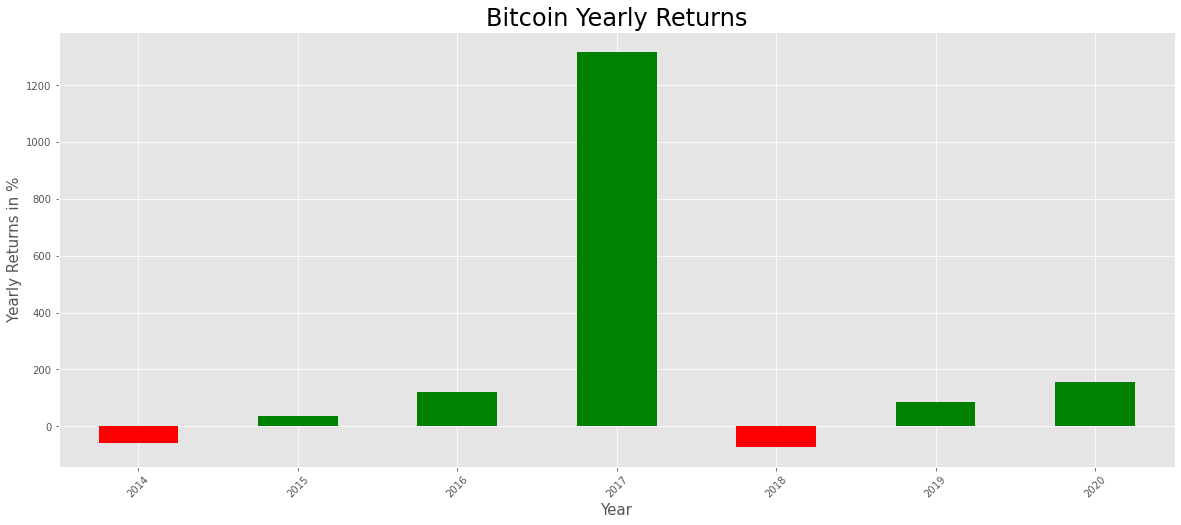

In [98]:
f, ax = plt.subplots(figsize=(20,8))

rets_df['Yrly_Returns'].plot(kind = 'bar',  color=(rets_df['Yrly_Returns'] > 0).map({True: 'g', False: 'r'}))
ax.set_title('Bitcoin Yearly Returns', fontsize=24)
ax.set_ylabel('Yearly Returns in %', fontsize=15)
plt.xticks(rotation=45)
ax.set_xlabel('Year', fontsize=15)